In [20]:
# 载入此项目所需要的库
import inline as inline
import matplotlib as matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import boston_housing_package.visuals as vs  # Supplementary code
from sys import version_info
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
# 忽略运行中的warning
warnings.filterwarnings('ignore')
# 让结果在notebook中显示
%matplotlib inline

In [21]:
# 检查你的Python版本
if version_info.major != 3 and version_info.minor != 7:
    raise Exception('请使用Python 3.7来完成此项目')


In [22]:
# 载入波士顿房屋的数据集
data = pd.read_csv('/Users/lavender/PycharmProjects/MLProject_python3/boston_housing_package/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis=1)


In [23]:
# 完成
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


Boston housing dataset has 489 data points with 4 variables each.


In [24]:
# TODO 1
# 目标：计算价值的最小值
minimum_price = np.min(prices)
# 目标：计算价值的最大值
maximum_price = np.max(prices)
# 目标：计算价值的平均值
mean_price = np.mean(prices)
# 目标：计算价值的中值
median_price = np.median(prices)
# 目标：计算价值的标准差
std_price = np.std(prices)
# 目标：输出计算的结果
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [25]:
# TODO 2
# 提示： 导入train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)


In [26]:
# TODO 3
# 提示： 导入r2_score
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    score = r2_score(y_true, y_predict)
    return score


In [27]:
# TODO 3
# 提示： 导入r2_score
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    score = r2_score(y_true, y_predict)
    return score


In [28]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.923.


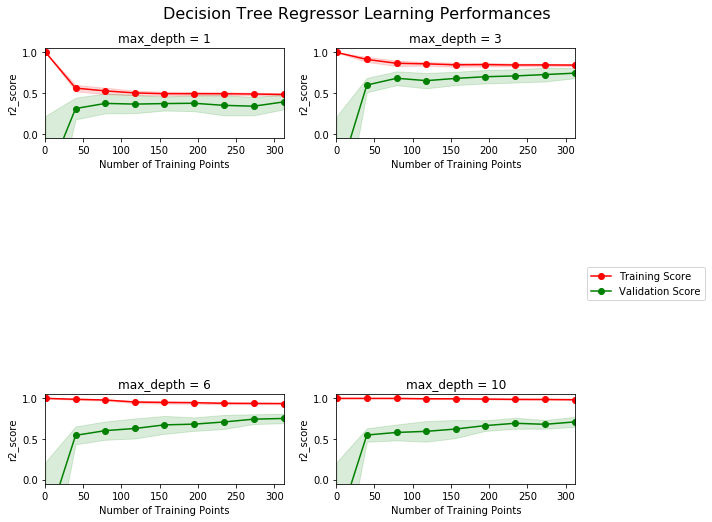

In [30]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)


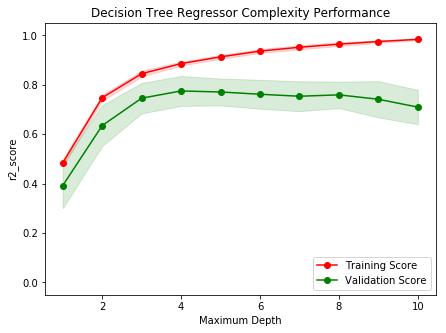

In [31]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)


In [33]:
# TODO 4
# 提示: 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV'


def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""

    cross_validator = KFold(10)

    regressor = DecisionTreeRegressor()

    params = {"max_depth": range(1, 11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)

    # 返回网格搜索后的最优模型
    return grid.best_estimator_


In [34]:
# TODO 4 可选

'''
不允许使用 DecisionTreeRegressor 以外的任何 sklearn 库

提示: 你可能需要实现下面的 cross_val_score 函数

def cross_val_score(estimator, X, y, scoring = performance_metric, cv=3):
    """ 返回每组交叉验证的模型分数的数组 """
    scores = [0,0,0]
    return scores
'''


def fit_model2(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""

    # 最优交叉验证分数对应的最优模型
    best_estimator = None

    return best_estimator


In [36]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)


In [37]:
# 输出最优模型的 'max_depth' 参数
print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))


Parameter 'max_depth' is 4 for the optimal model.


In [38]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

In [39]:
# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [40]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, optimal_reg, performance_metric
# 提示：你可能需要参考问题10的代码进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

predicted = optimal_reg.predict(X_test)
r2 = performance_metric(y_test,predicted)

print("Optimal model has R^2 score {:,.2f} on test data".format(r2))


# 请先注释掉 fit_model 函数里的所有 print 语句
vs.PredictTrials(features, prices, fit_model, client_data)


Optimal model has R^2 score 0.77 on test data


Trial 1: $391,183.33


Trial 2: $411,417.39


Trial 3: $415,800.00


Trial 4: $420,622.22


Trial 5: $413,334.78


Trial 6: $411,931.58


Trial 7: $399,663.16


Trial 8: $407,232.00


Trial 9: $402,531.82


Trial 10: $413,700.00

Range in prices: $29,438.89
